In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# CNN v/s Regression Accuracy Comparison

<h2>   
      <span>          
           Contents
    </span>
       
</h2>
<span>
    <ul>
        <li><a href='#intro'>1. Introduction</a></li>
        <ul>
            <li><a href='#background'>1.1 Background info</a></li>
        </ul>
        <li><a href='#libraries'>2. Python Libraries</a></li>
        <ul>
            <li><a href='#python'>2.1 Import Python Libraries</a></li>
         </ul>
        <li><a href='#understand'>3. Understanding the data</a></li>
        <ul>
            <li><a href='#import'>3.1 Importing the input csv</a></li>
            <li><a href='#inspect'>3.2 Overview the dataframes</a></li>
        </ul>
              <li><a href='#lr'>4. Logistic Regression Analysis</a></li>
        <ul>
            <li><a href='#split'>4.1 Split the Data</a></li>
            <li><a href='#presetup'>4.2 Regression Presetup</a></li>
            <li><a href='#training'>4.3 Model Training</a></li>
            <li><a href='#prediction'>4.4 Model Prediction</a></li>
            <li><a href='#check'>4.5 Check Accuracy score</a></li>   
        </ul>
              <li><a href='#cnn'>5. Convolutional Neural Network (CNN) </a></li>
        <ul>
            <li><a href='#importcnn'>5.1 Imports CNN Modules</a></li>
            <li><a href='#datareshape'>5.2 Data Reshape</a></li>
            <li><a href='#label'>5.3 Update Label values</a></li>
            <li><a href='#splitdata'>5.4 Split the data</a></li>
            <li><a href='#model_Train'>5.5 Model Training </a></li>   
            <li><a href='#model_eva'>5.6 Model Evaluation</a></li>    
            <li><a href='#visual'>5.7 Visualize Predicted v/s real</a></li> 
        </ul>
                <li><a href='#concl'>6. Conclusion</a></li>
        <ul>
            <li><a href='#cnnvsre'>6.1 CNN v/s Regression</a></li>
        </ul>  
                <li><a href='#submis'>7. Submission</a></li>
        <ul>
            <li><a href='#model_subm'>7.1 Model submission</a></li>
                        


<a id="intro"></a>
<h2>   
    <font  color='red'>
          <span>
            1. Introduction :
            </span>   
    </font>
</h2>

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            1.1 Background Info :
            </span>   
    </font>
</h3>

<p>
The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.
<br>    
It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.
    
    
</p>

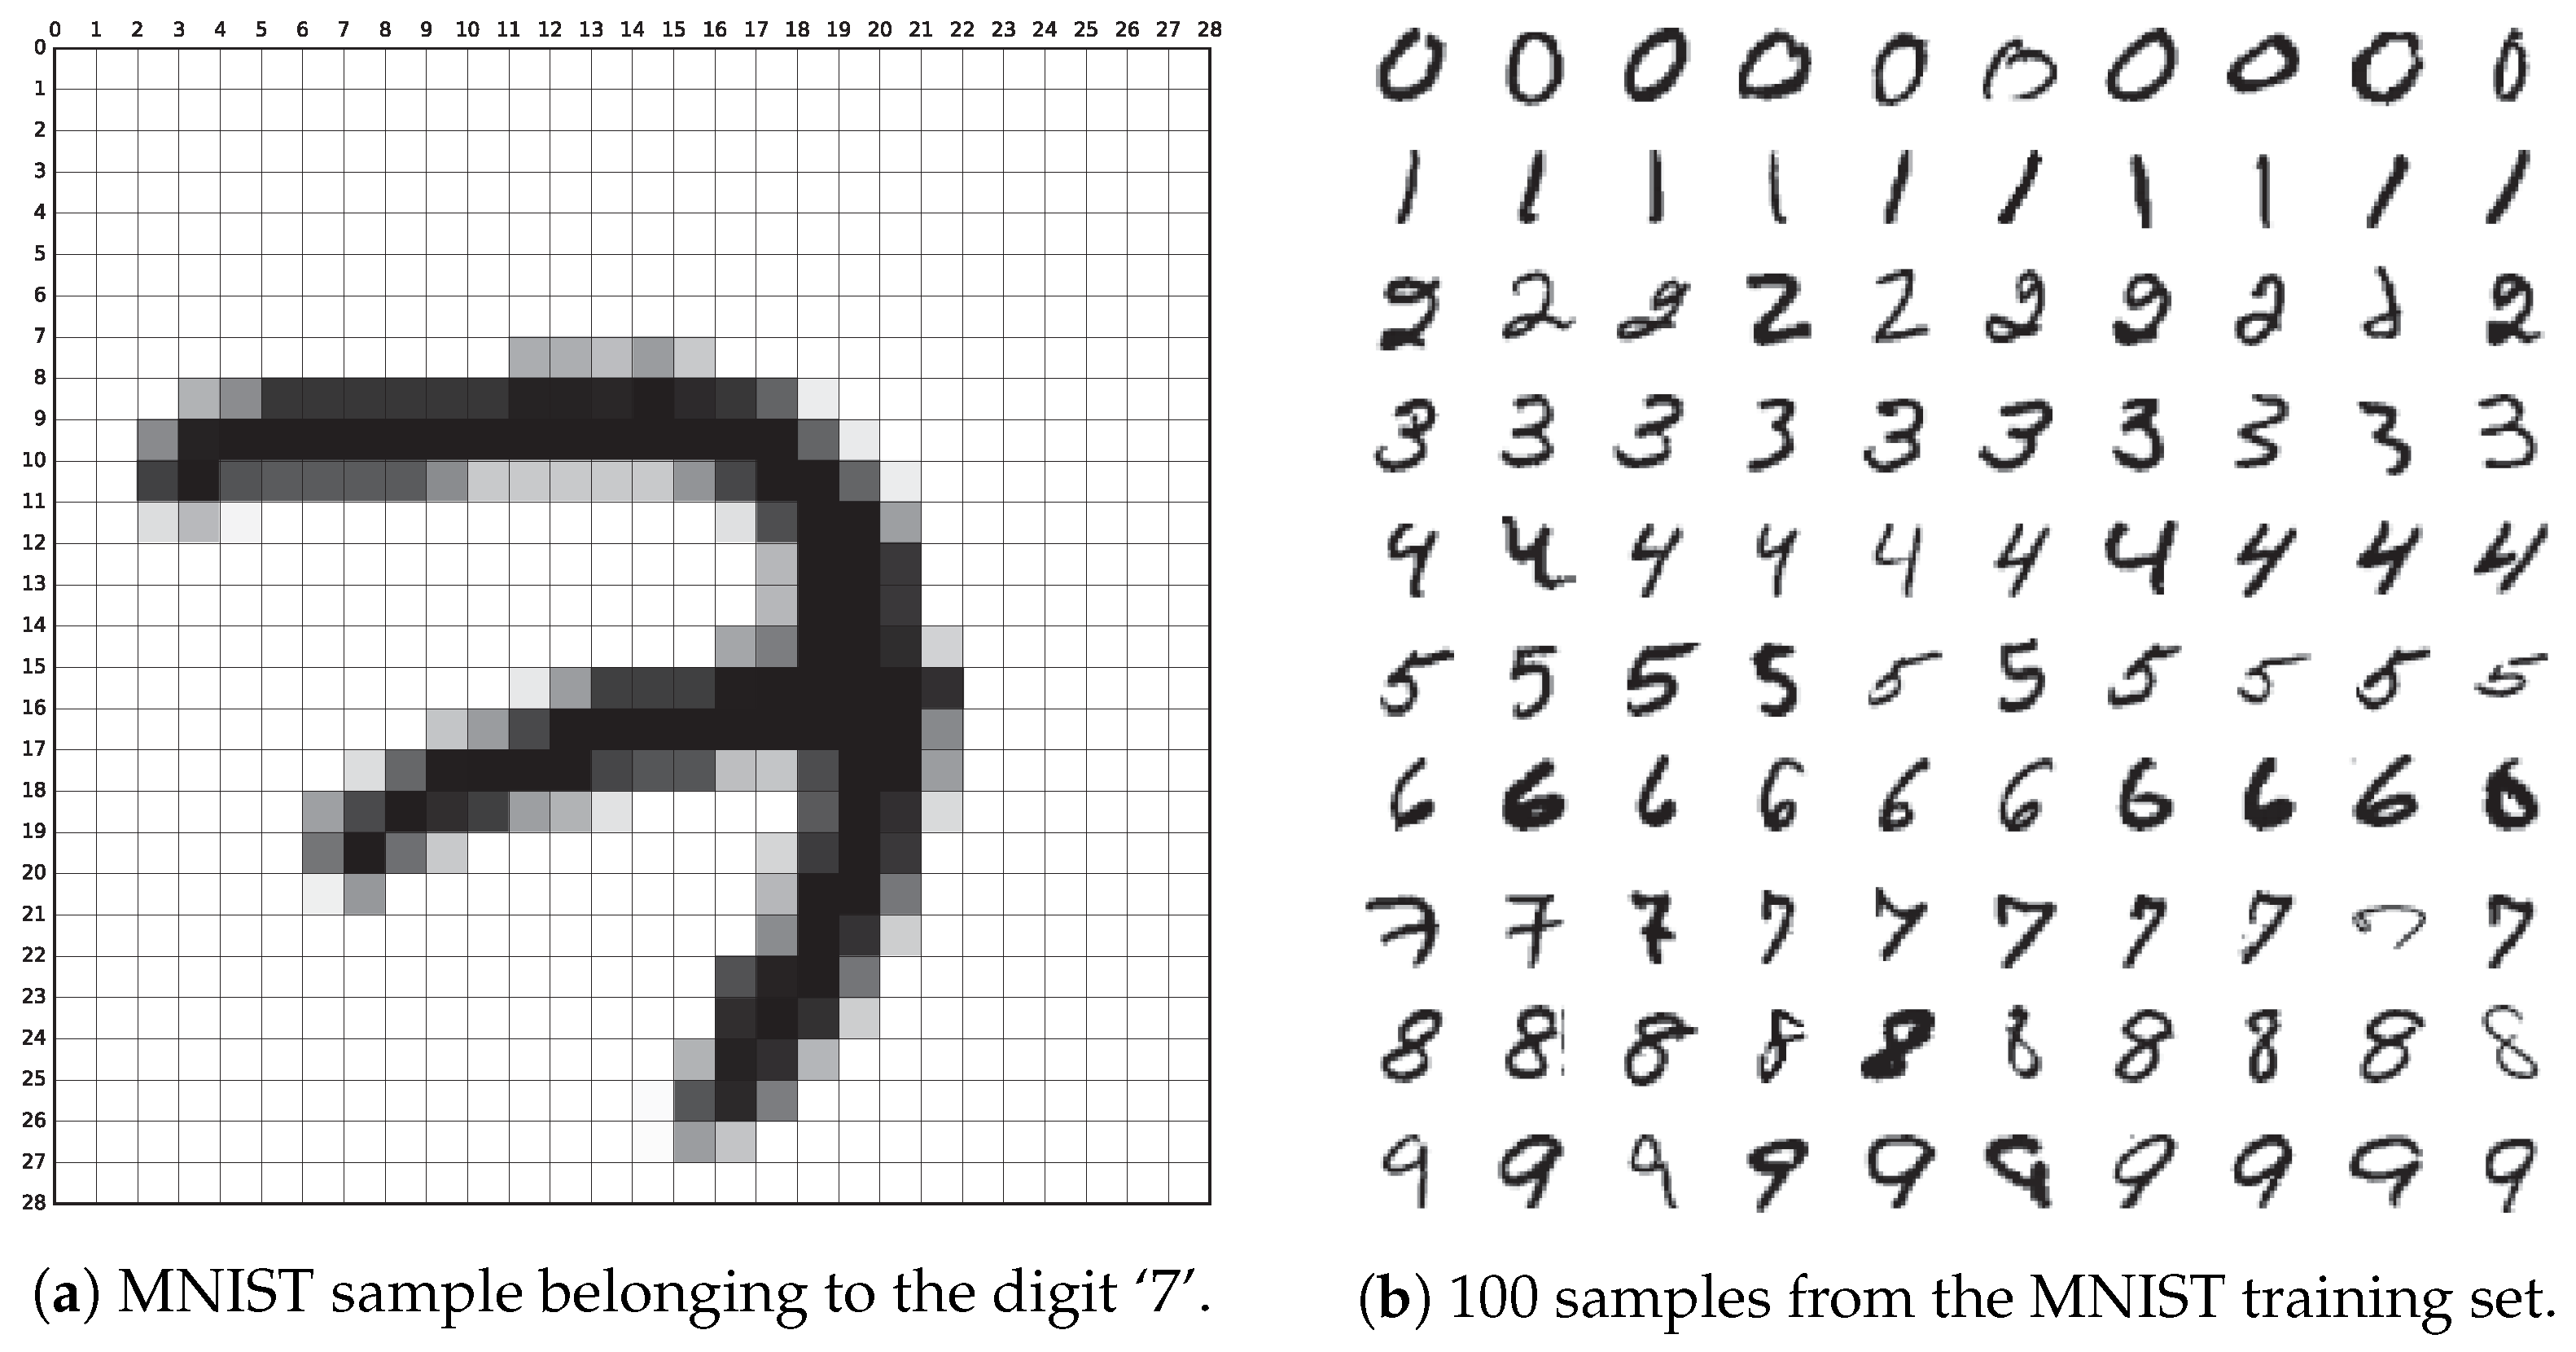
<img width="200">



<a id="intro"></a>
<h2>   
    <font  color='red'>
          <span>
            2. Python Libraries:
            </span>   
    </font>
</h2>

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
           2.1 Import Python Libraries
            </span>   
    </font>
</h3>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
LR_train = train_data.copy()
LR_test = test_data.copy()
CNN_train = train_data.copy()
CNN_test = test_data.copy()

<a id="intro"></a>
<h2>   
    <font  color='red'>
          <span>
           3. Understanding the data
            </span>   
    </font>
</h2>

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
           3.1 Importing the input csv
            </span>   
    </font>
</h3>

In [ ]:
LR_train.head(3)

In [ ]:
LR_test.head(3)

In [ ]:
print("Training: {} and Test : {}".format(LR_train.shape, LR_test.shape))

<a id="intro"></a>
<h2>   
    <font  color='red'>
          <span>
4. Linear Regression Analysis
            </span>   
    </font>
</h2>

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            4.1 Split the Data
            </span>   
    </font>
</h3>

In [ ]:
train_y = LR_train['label']

In [ ]:
# drop the label from train dataset
LR_train.drop(['label'], axis=1, inplace=True)
LR_train.head(2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(LR_train, train_y, test_size=0.3, random_state=42)

In [ ]:
print("X train: {}".format(x_train.shape))
print("Y train: {}".format(y_train.shape))
print("X test: {}".format(x_test.shape))
print("Y test: {}".format(y_test.shape))

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            4.2 Regression Presetup
            </span>   
    </font>
</h3>

In [ ]:
from sklearn.linear_model import LogisticRegression
regress = LogisticRegression(max_iter=500)

In [ ]:
regress

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<a id="intro"></a>
<h2>   
    <font  color='orange'>
          <span>
            4.3 Model Training
            </span>   
    </font>
</h2>

In [ ]:
regress.fit(x_train, y_train)

<a id="intro"></a>
<h2>   
    <font  color='orange'>
          <span>
            4.4 Model Prediction
            </span>   
    </font>
</h2>

In [ ]:
pred = regress.predict(x_test)

In [ ]:
pred

<a id="intro"></a>
<h2>   
    <font  color='orange'>
          <span>
           4.5 Check Accuracy score
            </span>   
    </font>
</h2>

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
regress_acc = accuracy_score(pred, y_test)* 100
print("Regression Score: {}".format(regress_acc))

In [ ]:
regress_acc

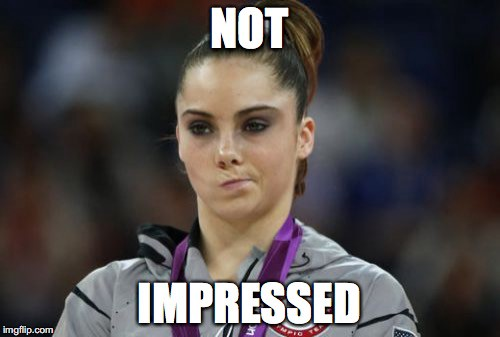

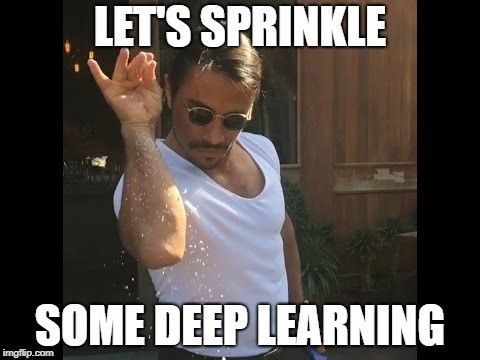

<a id="intro"></a>
<h2>   
    <font  color='red'>
          <span>
           5. Convolutional Neural Network (CNN) 
            </span>   
    </font>
</h2>

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            5.1 Imports CNN Modules
            </span>   
    </font>
</h3>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            5.2 Data Reshape
            </span>   
    </font>
</32>

In [ ]:
# reshape for CNN

CNN_train.head(3)

In [ ]:
print("CNN Training: {} and CNN Test: {}".format(CNN_train.shape, CNN_test.shape))

In [ ]:
CNN_y_train  = CNN_train['label'].values
CNN_x_train = CNN_train.drop(['label'],1).values

In [ ]:
CNN_test = CNN_test.values

In [ ]:
# let check the values again
CNN_x_train[:5]

In [ ]:
CNN_y_train[:5]

In [ ]:
CNN_test[:5]

Values are between [0,1]

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
           5.3 Update Label values
            </span>   
    </font>
</h3>

we have 784 columns ( 28 * 28 * 1)  which means images are of 28,28 size with black and white images


So, we will reshape them into 28,28 size

In [ ]:
# reshape the values
CNN_x_train = CNN_x_train.reshape(-1,28,28,1)
CNN_test = CNN_test.reshape(-1,28,28,1)

In [ ]:
CNN_x_train[:4]

<a id="intro"></a>
<h2>   
    <font  color='orange'>
          <span>
            5.4 Split the data
            </span>   
    </font>
</h2>

We have label as 1,2,3,4,5 out of 9, hence we will convert each values in categorical values

In [ ]:
# Do one hot encoding
from keras.utils.np_utils import to_categorical


In [ ]:
CNN_y_train[3]

4 will convert into  [0,0,0,1,0,0,0,0,0]

This is called one hot encoding

In [ ]:
y = to_categorical(CNN_y_train)
print("Label size: {}".format(y.shape))

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
5.5 Model Training 
            </span>   
    </font>
</h3>

In [ ]:
# split train and validation dataset

CNN_train_split, CNN_test_split, CNN_y_train_split, CNN_y_test_split = train_test_split(CNN_x_train, y, test_size=0.2, random_state=0)

In [ ]:
print("\n\nCNN Data Size \n\n")

print("CNN_train_split  size : {}\n".format(CNN_train_split.shape))
print("CNN_test_split  size : {}\n".format(CNN_test_split.shape))
print("CNN_y_train_split size  : {}\n".format(CNN_y_train_split.shape))
print("CNN_y_test_split  size : {}\n".format(CNN_y_test_split.shape))


CNN structure:-

(1) COnv 2d Layer  - input size (28,28)

(2) COnv 2d layer

(3) Max Pooling2D Layer

(4) Flatten Layer to Flatten the matrices

(5) Dense Layer with 'relu activation function

(6) Dropout to reduce linearity in the model

(7) Dense  with 9 Output Layer for predictions

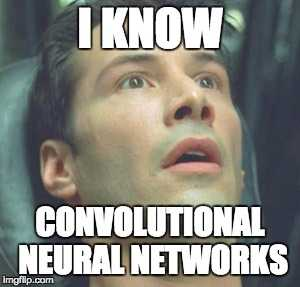

In [ ]:
# Let visualize
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))



In [ ]:
model.summary()

In [ ]:
# Compile

model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
batch_size = 64
epochs = 10

In [ ]:
history = model.fit(CNN_train_split,CNN_y_train_split, epochs=epochs,
         batch_size=batch_size)

<a id="intro"></a>
<h3>   
    <font  color='red'>
          <span>
            5.6 Model Evaluation
            </span>   
    </font>
</h3>

In [ ]:
acc = model.evaluate(CNN_test_split, CNN_y_test_split)


In [ ]:
# First one is loss and second value in argument

acc_score = round(acc[1] * 100, 2)
print('CNN acc is ', acc_score )

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            5.7 Visualize Predicted v/s real
            </span>   
    </font>
</h3>

In [ ]:


fig, axis = plt.subplots(2, 2, figsize=(12, 14))

for i, ax in enumerate(axis.flat):
    ax.imshow(CNN_test_split[i].reshape(28,28), cmap='binary')
    pred = model.predict(CNN_test_split[i].reshape(1, 28, 28, 1)).argmax()
    real = CNN_y_test_split[i].argmax()
    ax.set_title('Predicted: {} \n Real: {}'.format(pred,real), fontsize=30, color='red')


<a id="intro"></a>
<h2>   
    <font  color='red'>
          <span>
            6. Conclusion
            </span>   
    </font>
</h2>

In [ ]:
Logistic_Regression = round(regress_acc, 2)
Logistic_Regression

<a id="intro"></a>
<h3>   
    <font  color='orange'>
          <span>
            6.1 CNN v/s Regression
            </span>   
    </font>
</h3>

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "gauge+number",
    value = Linear_Regression,
    title = {'text': "Logistic Regression Accuracy"},
    domain = {'x': [0, 0.25], 'y': [0, 1]}
))
fig.add_trace(go.Indicator(
    mode = "gauge+number",
    value = acc_score,
    title = {'text': "CNN Accuracy"},
    domain={'x':[0.45,0.80],'y':[0,1]}
))
# fig.update_layout(width=400, height=500)
fig.show()

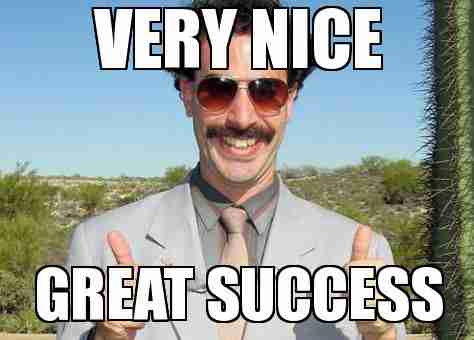

<a id="intro"></a>
<h2>   
    <font  color='red'>
          <span>
            7. Submission
            </span>   
    </font>
</h2>

In [ ]:
pred = model.predict_classes(CNN_test, verbose=1)


In [ ]:
subm = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
subm.head(2)

In [ ]:
subm['Label'] = pred

In [ ]:
subm

In [ ]:
subm.to_csv("submission.csv",index=False)